In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import string

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
paragraph = """Natural Language Processing (NLP) is important because it helps machines understand and interact with human language — the way we speak, write, and communicate.NLP allows us to talk to computers in our own language instead of code (think Siri, Alexa, or chatbots). It powers search engines, translators, and summarizers, helping us find and understand huge amounts of information quickly.It can automatically read, analyze, and categorize documents—saving time in customer support, healthcare, finance, and more.

"""


In [4]:
text_clean = paragraph.lower().translate(str.maketrans('','',string.punctuation))


<Axes: title={'center': 'Word Frequency Distribution (Excluding Stopwords)'}, xlabel='Samples', ylabel='Counts'>

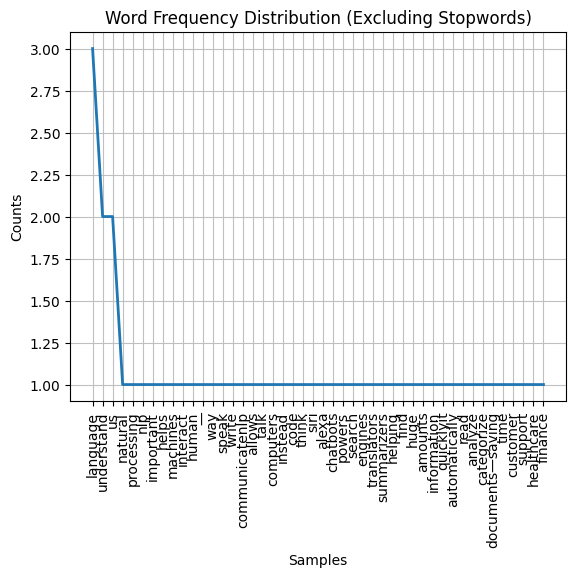

In [5]:
word_tokens = word_tokenize(text_clean)
sentence_tokens = sent_tokenize(paragraph)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]
fdist = FreqDist(filtered_words)
fdist.plot(title="Word Frequency Distribution (Excluding Stopwords)")

In [6]:
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

nltk.download('wordnet')
nltk.download('omw-1.4')

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

porter_stems = [porter.stem(word) for word in filtered_words]
lancaster_stems = [lancaster.stem(word) for word in filtered_words]
lemmas = [lemmatizer.lemmatize(word) for word in filtered_words]

df = pd.DataFrame({
    'Original': filtered_words,
    'PorterStemmer': porter_stems,
    'LancasterStemmer': lancaster_stems,
    'Lemmatizer': lemmas
})
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Original,PorterStemmer,LancasterStemmer,Lemmatizer
0,natural,natur,nat,natural
1,language,languag,langu,language
2,processing,process,process,processing
3,nlp,nlp,nlp,nlp
4,important,import,import,important
5,helps,help,help,help
6,machines,machin,machin,machine
7,understand,understand,understand,understand
8,interact,interact,interact,interact
9,human,human,hum,human


In [7]:
import re


text = paragraph
words_more_than_5 = re.findall(r'\b\w{5,}\b', text)
print(words_more_than_5)

['Natural', 'Language', 'Processing', 'important', 'because', 'helps', 'machines', 'understand', 'interact', 'human', 'language', 'speak', 'write', 'communicate', 'allows', 'computers', 'language', 'instead', 'think', 'Alexa', 'chatbots', 'powers', 'search', 'engines', 'translators', 'summarizers', 'helping', 'understand', 'amounts', 'information', 'quickly', 'automatically', 'analyze', 'categorize', 'documents', 'saving', 'customer', 'support', 'healthcare', 'finance']


In [8]:
numbers = re.findall(r'\d+', text)
print(numbers)

[]


In [9]:
captialiazed_words = re.findall(r'\b[A-Z][a-z]*\b', text)
print(captialiazed_words)

['Natural', 'Language', 'Processing', 'Siri', 'Alexa', 'It', 'It']


In [10]:
alphabets_to_words = re.findall(r'\b[a-zA-Z]+\b', text)
print(alphabets_to_words)

['Natural', 'Language', 'Processing', 'NLP', 'is', 'important', 'because', 'it', 'helps', 'machines', 'understand', 'and', 'interact', 'with', 'human', 'language', 'the', 'way', 'we', 'speak', 'write', 'and', 'communicate', 'NLP', 'allows', 'us', 'to', 'talk', 'to', 'computers', 'in', 'our', 'own', 'language', 'instead', 'of', 'code', 'think', 'Siri', 'Alexa', 'or', 'chatbots', 'It', 'powers', 'search', 'engines', 'translators', 'and', 'summarizers', 'helping', 'us', 'find', 'and', 'understand', 'huge', 'amounts', 'of', 'information', 'quickly', 'It', 'can', 'automatically', 'read', 'analyze', 'and', 'categorize', 'documents', 'saving', 'time', 'in', 'customer', 'support', 'healthcare', 'finance', 'and', 'more']


In [11]:
words_starting_vowel = re.findall(r'\b[aeiouAEIOU]\w*\b', text)
print(words_starting_vowel)

['is', 'important', 'it', 'understand', 'and', 'interact', 'and', 'allows', 'us', 'in', 'our', 'own', 'instead', 'of', 'Alexa', 'or', 'It', 'engines', 'and', 'us', 'and', 'understand', 'amounts', 'of', 'information', 'It', 'automatically', 'analyze', 'and', 'in', 'and']


In [12]:
def custom_tokenizer(text):
    pattern = r"\b\w+(?:-\w+)*\b|\d+\.\d+|\w+'\w+"
    return re.findall(pattern, text)

print(custom_tokenizer(paragraph))

['Natural', 'Language', 'Processing', 'NLP', 'is', 'important', 'because', 'it', 'helps', 'machines', 'understand', 'and', 'interact', 'with', 'human', 'language', 'the', 'way', 'we', 'speak', 'write', 'and', 'communicate', 'NLP', 'allows', 'us', 'to', 'talk', 'to', 'computers', 'in', 'our', 'own', 'language', 'instead', 'of', 'code', 'think', 'Siri', 'Alexa', 'or', 'chatbots', 'It', 'powers', 'search', 'engines', 'translators', 'and', 'summarizers', 'helping', 'us', 'find', 'and', 'understand', 'huge', 'amounts', 'of', 'information', 'quickly', 'It', 'can', 'automatically', 'read', 'analyze', 'and', 'categorize', 'documents', 'saving', 'time', 'in', 'customer', 'support', 'healthcare', 'finance', 'and', 'more']


In [13]:
print(re.findall(r'\S+@\S+', paragraph))  # Emails
print(re.findall(r'(\+91\s?)?\d{10}', paragraph))  # Phone numbers
print(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', paragraph)) # url


[]
[]
[]
